# Predicting BigMart Sales
Provided by Analytics Vidhya, we have been participating in the BigMart Sales Practice Problem which began on May 25th, 2016, and ends on December 31st, 2018. Data scientists at BigMart have “collected 2013 sales data for 1559 products across 10 stores in different cities”, which participants will use to build a model to predict product sales by store. With this, BigMart will try to gain understanding of product and store properties that lead to increased sales.

Using data to increase profitability is now an intuitive and common practice in business; the type, number, and even physical placement of products is no longer arbitrary, rather, it is determined by data. Therefore, this study echoes the common business approach to increasing profitability: data-driven decision making.


_**Problem Statement**: “The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.”_


## Data Info
As mentioned above, the data for this challenge was collected and provided to participants by BigMart. Data scientists at BigMart “collected 2013 sales data for 1559 products across 10 stores in different cities.” Store and product include defined attributes, such as ID’s, category type, visibility, etc. The training dataset has 8,523 rows, and testing dataset has 5,681 rows. The training data has both input and output variables. Our task is to predict the sales for the testing dataset.

** -Any important features on the dataset that are worth mentioning? Problems/bias with something?-**

In [1]:
# Include required visualizations for this section
# could this be covered with the baseline analysis or nah?

In [2]:
# Refer to notebook 4

import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

#%run data-prep.ipynb
%run linear_regression_helper.ipynb

C:\Users\SarahPark\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Quantitative Questions
### What we are trying to learn:
1. What properties of store are key in determining store profitability?
2. What properties of products are key in determining product profitability?
3. What products are most profitable in each location?
    What category of products are most profitable in each location?
5. What types of location are most profitable?


### Specific hypotheses we will be testing:

This is our initial list of hypotheses we planned to test:
1. Item visibility affects the sale of the product.
    Ex: the more exposed the item, the more sales it produces
2. Outlet size and outlet location type affects the profitability of a store.
 Ex: the larger the store, the more profits
3. Profitability of a store is dependent on the product(s) it offers and its location
4. Item that is placed at bigger shelf or shelf with height of average people is more likely catch customers’ attention and thus should have more sales
5. Outlet with longer history is more likely to have higher profitability because it has impacted for the area for longer time
6. Stores that are located in tier 1 cities or urban areas should have higher sales because people who live in these areas tend to have higher levels of income

After further inspection of the structure of the data, we must exclude some of them. Below shows our final hypotheses included in the analysis:

1. Item visibility affects the sale of the product
2. Outlet size and outlet location type affects the profitability of a store
3. Stores that are located in tier 1 cities or urban areas should have higher sales because people who live in these areas tend to have higher levels of income


## Methods


### Baseline or whatever you wanna call it
We will first start with baseline model, which requires no prediction. We simply calculate mean values for a given category and compare with each other.

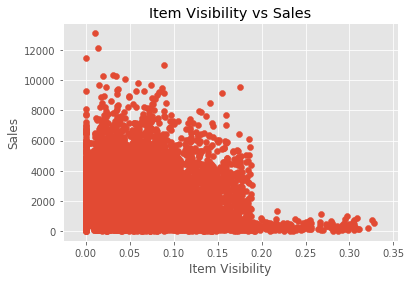

In [3]:
preview('Item_Visibility', 'continuous')

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64


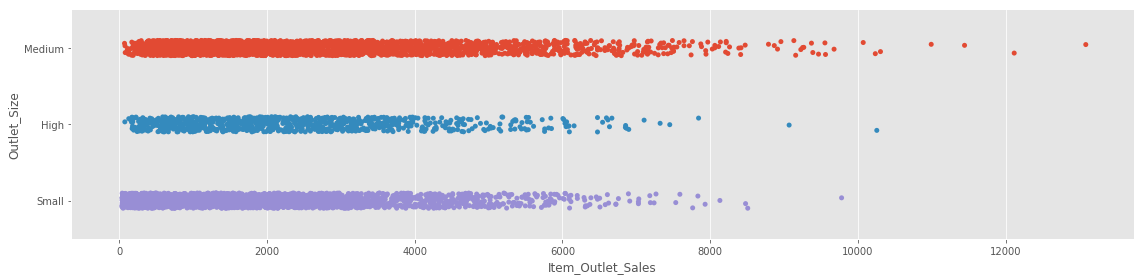

In [4]:
preview('Outlet_Size', 'descriptive')

* It is observed that mean outlet sales for medium-sized outlets are higher than high or small-sized outlets

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64


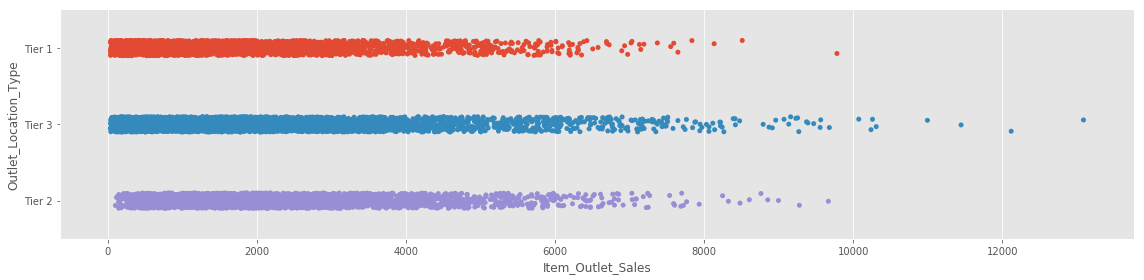

In [5]:
preview('Outlet_Location_Type', 'descriptive')

* It is observed that mean oulet sales are higher for outlets in Tier 2 Locations compared to outlets in Tier 3 Locations, followed by Tier 1 Locations

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64


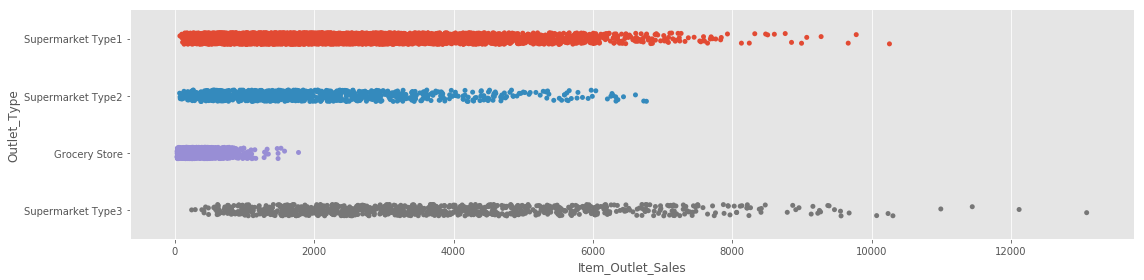

In [6]:
preview('Outlet_Type', 'descriptive')

* It is observed that mean outlet sales are highest for Type 3 Supermarkets, followed by Type 1 Supermarkets, then Type 2 Supermarkets. Grocery Stores have noticeably lower outlet sales on average.

### Multiple Regression
We will now try a multiple regression using a linear model if both dependent and independent variables we are interested in are continuous and can fit linear regression well.

#### Testing Hypothesis 1

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     143.3
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           9.04e-33
Time:                        17:43:20   Log-Likelihood:                -75452.
No. Observations:                8523   AIC:                         1.509e+05
Df Residuals:                    8521   BIC:                         1.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2462.6155     29.803     

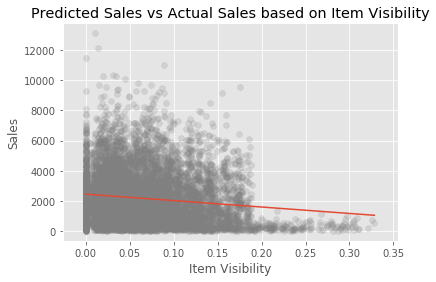

In [7]:
GetHyp1()

### Item Visibility

* Betas: Each additional unit of visibility is associated with an -\$355.310 change in outlet sales in general
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$355.310
* Confidence Interval: There is a 95% chance the true value lies between -\$4950.507 and -\$3557.521

> We can observe a negative relationship between Sales and Item Visibility. Item Visibility is shown to be statistically significant.

#### Testing Hypothesis 2

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     206.3
Date:                Wed, 07 Mar 2018   Prob (F-statistic):          2.76e-310
Time:                        17:43:20   Log-Likelihood:                -53561.
No. Observations:                6113   AIC:                         1.071e+05
Df Residuals:                    6104   BIC:                         1.072e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

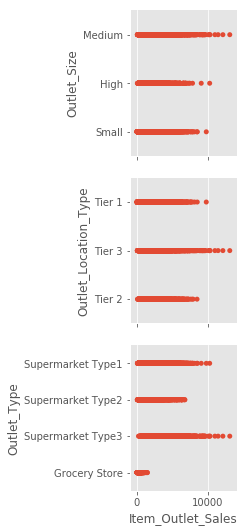

In [8]:
GetHyp2()


### Outlet Size

* Betas: Each additional unit of visibility is associated with an +\$916.8250 change in outlet sales for medium-sized outlets
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$39.403
* Confidence Interval: There is a 95% chance the true value lies between \$839.582 and \$994.068


### Outlet Location Type

* Betas: Each additional unit of visibility is associated with an +\$867.2392 change in outlet sales for outlets located in Tier 3 Locations
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$39.396
* Confidence Interval: There is a 95% chance the true value lies between \$790.009 and \$944.469

### Outlet Type

* Betas: Each additional unit of visibility is associated with a +\$2402.5746 change in  outlet sales for Type 3 Supermarkets
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$96.386
* Confidence Interval: There is a 95% chance the true value lies between \$2213.624 and \$542.587

### Item Visibility

* Betas: Each additional unit of visibility is associated with an -\$266.7973 change in outlet sales in general
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$409.997  
* Confidence Interval: There is a 95% chance the true value lies between -\$1070.536 and \$591.525

> We can observe a negative relationship between Sales and Item Visibility. However, the inclusion of the covariates Outlet Type, Outlet Location Type and Outlet Size make it so that the relationship is not statistically significant. We instead observe statistically significant relationships between Outlet Sales and these covariates.

#### Testing Hypothesis 3

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     79.71
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           7.53e-51
Time:                        17:43:21   Log-Likelihood:                -75405.
No. Observations:                8523   AIC:                         1.508e+05
Df Residuals:                    8519   BIC:                         1.508e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

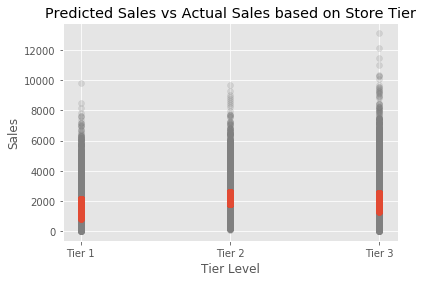

In [9]:
GetHyp3()

### Outlet Location Type

* Betas: Each additional unit of visibility is associated with an +\$406.0533 change in outlet sales for outlets located in Tier 2 Locations
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$47.086
* Confidence Interval: There is a 95% chance the true value lies between \$313.754  and \$473.171

### Item Visibility

* Betas: Each additional unit of visibility is associated with an -\$4035.2495 change in outlet sales in general
* Standard Error: The standard deviation of the sampling distribution is (+/-)\$354.458  
* Confidence Interval: There is a 95% chance the true value lies between -\$1070.536 and \$473.171

> We can observe a negative relationship between Sales and Item Visibility. The relationship is statistically significant. We also observe statistically significant, positive relationship between Outlet Sales and Outlet Location Type per unit of item visibility. The trend is higher for outlets in Tier 2 Locations compared to Tier 3 Locations.


### Machine Learning Models

Finally, we will use decision tree model to predict sales. The data it split into testing and training. This allows us to train our program with training data and then test our program with testing data. We will keep adjusting predictors to find the point when the program has the highest accuracy predicting sales.

In [10]:
# Just including decision tree? Or are we including all the models we have submitted and compare w/ visuals like a4?
# kari and zico por favor

## Results

#### Multilinear Regression
- Based on the nature of our preliminary regressions, we have concluded that the first hypotheses returns somewhat meaningful results whereas when other covariates are introduced the findings become negligible. The findings of the regression was as we predicted as there are many other factors that we were not able to assess due to the lack of time, resources, and skills within the team for this analysis. The results of the data was lacking due to the type of data - where we may have desired continuous variables but we had left them as categorical.

## Discussion

-Include future steps- (remove this when done)

#### Multilinear Regression
- One of our next steps would be to refine our hypotheses as well as the features we inspect for our regression analysis; we picked those areas of interest prior to assessing the dataset fully and we should have opted to review the dataset and identify key areas of interest. Also we may want to investigate other distributions and transform our existing data to match those distributions.

#### Machine Learning
Zico or Kari here por favor